In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm

In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/train.txt', sep = ';')


In [ ]:
Data

,i didnt feel humiliated,sadness
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
17994,im having ssa examination tomorrow in the morn...,sadness
17995,i constantly worry about their fight against n...,joy
17996,i feel its important to share this info for th...,joy
17997,i truly feel that if you are passionate enough...,joy


In [ ]:
Data.head()

,i didnt feel humiliated,sadness
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [ ]:
Data.isnull().sum()

i didnt feel humiliated    0
sadness                    0
dtype: int64

In [ ]:
Data = Data.rename(columns={'i didnt feel humiliated': 'Text', 'sadness': 'Mood'})

In [ ]:
Data

,Text,Mood
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
17994,im having ssa examination tomorrow in the morn...,sadness
17995,i constantly worry about their fight against n...,joy
17996,i feel its important to share this info for th...,joy
17997,i truly feel that if you are passionate enough...,joy


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 4.7 MB/s 
     |████████████████████████████████| 287 kB 29.1 MB/s 


In [ ]:
import contractions


In [ ]:
for i in range(len(Data)):
  Data.iloc[i,0] = contractions.fix(Data.iloc[i,0])

In [ ]:
Data

,Text,Mood
0,i can go from feeling so hopeless to so damned...,sadness
1,i am grabbing a minute to post i feel greedy w...,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,i have been feeling a little burdened lately w...,sadness
...,...,...
17994,i am having ssa examination tomorrow in the mo...,sadness
17995,i constantly worry about their fight against n...,joy
17996,i feel its important to share this info for th...,joy
17997,i truly feel that if you are passionate enough...,joy


In [ ]:
def Lemm(sentence):
    stop_words = set(stopwords.words('english'))
    sentence = contractions.fix(sentence)
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub('[^A-z]', ' ', sentence)
    negative = ['not', 'neither', 'nor', 'but', 'however',
                'although', 'nonetheless', 'despite', 'except',
                        'even though', 'yet','unless']
    stop_words = [z for z in stop_words if z not in negative]
    preprocessed_tokens = [lemmatizer.lemmatize(contractions.fix(temp.lower())) for temp in sentence.split() if temp not in stop_words]
    return ' '.join([x for x in preprocessed_tokens]).strip()

In [ ]:
f = Lemm('Shady\'s here..gfgfdgfgb!? aare you?')

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
for i in range(len(Data)):
  Data.iloc[i,0] = Lemm(Data.iloc[i,0])
  print(i)

In [ ]:
Data

,Text,Mood
0,go feeling hopeless damned hopeful around some...,sadness
1,grabbing minute post feel greedy wrong,anger
2,ever feeling nostalgic fireplace know still pr...,love
3,feeling grouchy,anger
4,feeling little burdened lately not sure,sadness
...,...,...
17994,ssa examination tomorrow morning quite well pr...,sadness
17995,constantly worry fight nature push limit inner...,joy
17996,feel important share info experience thing,joy
17997,truly feel passionate enough something stay tr...,joy


In [ ]:
Data.iloc[:,-1].astype(object).astype(int)

0        0
1        1
2        2
3        1
4        0
        ..
17994    0
17995    5
17996    5
17997    5
17998    5
Name: Mood, Length: 17999, dtype: int64

In [ ]:
moods = {'sadness':0,
         'anger':1,
         'love':2,
         'surprise':3,
         'fear':4,
         'joy':5}

In [ ]:
for i in range(len(Data)):
  Data.iloc[i,-1] = moods[Data.iloc[i,-1]]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(Data.iloc[:,0]).toarray()
y = Data.iloc[:, 1]

In [ ]:
y = np.array(y)

In [ ]:
y = y.astype(int)

In [ ]:
y

array([0, 1, 2, ..., 5, 5, 5])

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([0, 1, 2, ..., 5, 5, 5], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[322 167 199 180 165  15]
 [ 17 281  93  60  46  10]
 [  9  10 221  36  21  19]
 [  2   7  16  68  11   7]
 [ 15  13  35  85 274  13]
 [  8 106 328 200 172 369]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


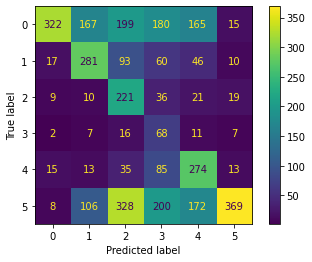

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred)

0.4263888888888889

In [ ]:
from sklearn.linear_model import LogisticRegression  
  
LR = LogisticRegression(random_state = 0, max_iter = 10000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [ ]:
y_predLR = LR.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cmLR = confusion_matrix(y_test, y_predLR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


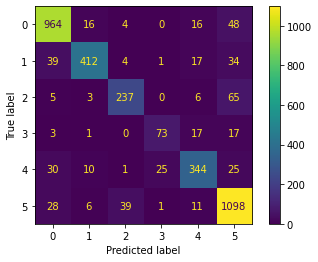

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test)
plt.show()

In [ ]:
import sklearn
sklearn.metrics.accuracy_score(y_test, y_predLR)

0.8688888888888889

In [ ]:
import pickle
filename = '/content/drive/MyDrive/Colab Notebooks/archive/LRModel.sav'
pickle.dump(LR, open(filename, 'wb'))

In [ ]:
Lemm("I'm not happy")

'i not happy'

In [ ]:
LR.predict(X_test)

array([5, 4, 5, ..., 2, 5, 5])

In [ ]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
m = cv.transform(['I am happy'])

In [ ]:
LR.predict(m)

array([5])

In [ ]:
moods['joy']

5

In [ ]:
pickle.dump(cv, open("/content/drive/MyDrive/Colab Notebooks/archive/vector.pickel", "wb"))